In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-prediction-using-tfdf/__results__.html
/kaggle/input/house-prices-prediction-using-tfdf/submission.csv
/kaggle/input/house-prices-prediction-using-tfdf/__notebook__.ipynb
/kaggle/input/house-prices-prediction-using-tfdf/__output__.json
/kaggle/input/house-prices-prediction-using-tfdf/custom.css
/kaggle/input/house-prices-prediction-using-tfdf/__results___files/__results___39_0.png
/kaggle/input/house-prices-prediction-using-tfdf/__results___files/__results___20_0.png
/kaggle/input/house-prices-prediction-using-tfdf/__results___files/__results___15_2.png
/kaggle/input/house-prices-prediction-using-tfdf/__results___files/__results___49_0.png
/kaggle/input/promt-score-csv/promt-score.csv


In [10]:
import pandas as pd

# 读取数据（假设已转为CSV）
df = pd.read_csv('/kaggle/input/promt-score-csv/prompt-score.csv', sep=',', encoding='gbk')  # 或直接读取Excel
prompts = df["User Prompt"].tolist()

In [1]:
!nvidia-smi

Sun Jul  6 14:10:36 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
from transformers import AutoModelForCausalLM, AutoTokenizer

# 加载7B轻量版（适合Kaggle T4 GPU）
model = AutoModelForCausalLM.from_pretrained("deepseek-ai/deepseek-llm-7b-base", device_map="auto")
tokenizer = AutoTokenizer.from_pretrained("deepseek-ai/deepseek-llm-7b-base")

def get_deepseek_response(prompt):
    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
    outputs = model.generate(**inputs, max_new_tokens=100)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# 测试调用
print(get_deepseek_response("你好！"))

config.json:   0%|          | 0.00/584 [00:00<?, ?B/s]

2025-07-06 14:11:15.277720: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751811075.671045      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751811075.781164      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


pytorch_model.bin.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/3.85G [00:00<?, ?B/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/9.97G [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/121 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/792 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Setting `pad_token_id` to `eos_token_id`:100001 for open-end generation.


你好！欢迎访问西安思源学院教务处网站
2019年12月10日 16:30 教务处 点击：[]
各二级学院、各相关单位：
根据学校教学工作安排，现将2019年12月16日-2020年1月10日期间校内考试安排如下：
一、考试安排
1.考试时间：2019年1


In [7]:
pip install dashscope

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.7 MB/s eta 0:00:0000:010:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import dashscope
from dashscope import Generation  # 需要添加这行导入
# 设置千问API Key（免费申请：https://help.aliyun.com/zh/dashscope/）
dashscope.api_key = os.getenv("DASHSCOPE_API_KEY") or "your qwen key"  # 建议用Kaggle Secrets存储
def score_with_qwen(prompt, answer):
    """使用千问模型进行评分"""
    system_prompt = """你是一个专业评分员，根据回答的准确性和相关性评分（1-10分）：
    评分标准：
    - 10分：完全准确且完整
    - 8分：基本正确，小瑕疵
    - 5分：部分正确但有问题
    - 2分：无关或错误
    只需返回数字，不要解释。"""
    
    try:
        response = Generation.call(
            model="qwen-max",
            messages=[
                {"role": "system", "content": system_prompt},
                {"role": "user", "content": f"问题：{prompt}\n回答：{answer}"}
            ],
            result_format='message'  # 获取结构化响应
        )
        return int(response.output.choices[0].message.content.strip())
    except Exception as e:
        print(f"千问评分失败: {e}")
        return 0

In [14]:
results = []
for prompt in prompts:
    try:
        answer = get_deepseek_response(prompt)
        score = score_with_qwen(prompt, answer)
        results.append({
            "Prompt": prompt,
            "Answer": answer,
            "Score": score
        })
    except Exception as e:
        print(f"处理失败：{prompt}\n错误：{e}")
        results.append({"Prompt": prompt, "Answer": "ERROR", "Score": -1})

# 转为DataFrame并保存
result_df = pd.DataFrame(results)
result_df.to_csv("evaluation_results.csv", index=False)

# 计算高分占比
high_score_ratio = (result_df["Score"] >= 8).mean()
print(f"高分（≥8分）占比：{high_score_ratio:.2%}")

Setting `pad_token_id` to `eos_token_id`:100001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100001 for open-end generation.


高分（≥8分）占比：0.00%


In [15]:
result_df

,Prompt,Answer,Score
0,感觉价格方面，Switch性价比搞，PS5要贵不少吧？,感觉价格方面，Switch性价比搞，PS5要贵不少吧？\nSwitch的性价比主要体现在游戏...,2
1,XBOX的价格和PS5的价格差不多吧？,XBOX的价格和PS5的价格差不多吧？\nPS5的价格是499美元，XBOX的价格是499英...,5
2,这个价格我都能买台不错的台式机了。,这个价格我都能买台不错的台式机了。\n1000块的笔记本，你想要什么？\n1000块的笔记本...,2


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31572 (\N{CJK UNIFIED IDEOGRAPH-7B54}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36136 (\N{CJK UNIFIED IDEOGRAPH-8D28}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

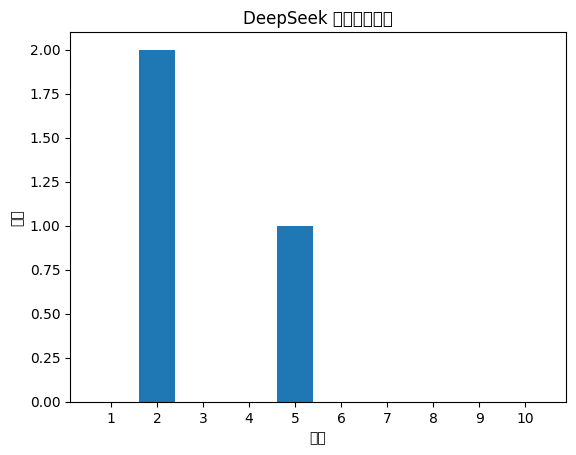

In [16]:
import matplotlib.pyplot as plt

plt.hist(result_df["Score"], bins=range(1, 12), align='left', rwidth=0.8)
plt.xticks(range(1, 11))
plt.xlabel("分数")
plt.ylabel("数量")
plt.title("DeepSeek 回答质量分布")
plt.show()